# Tarea 3 Algoritmos de Aprendizaje Supervisado

# Dataset Regresión Lineal – Vehicle dataset:

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [96]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [128]:
#librerias

import pandas as pd # manejo y analisis de estructuras de datos
import numpy as np # Calculo numerico y el analisis de datos
import seaborn as sns # Creacion de graficos estadisticos
import matplotlib.pyplot as plt # Creacion de graficos en dos dimensiones

#librerias para implemetar modelos de ciencia de datos / modelos de machir

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [5]:
# Lectura de datos en python y lo cargamos en la variable datos
# variable datos

Datos = pd.read_csv('./car data.csv')

In [7]:
# Realizamos lectura de los datos para el analisis exploratorio

Datos.head(40)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [9]:
# Descripcion de los datos

Datos.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [21]:
df = pd.DataFrame(Datos)

Text(0.5, 1.0, 'Identificacion de Datos Faltantes Y Atípicos Owner (dolor en el pecho)')

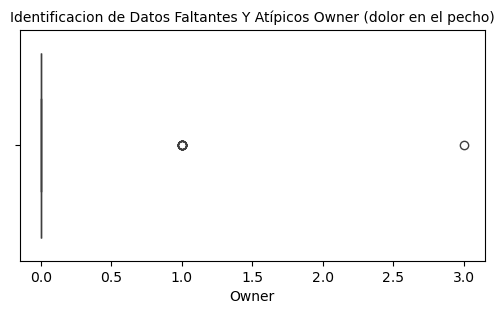

In [50]:
# Identificacion de datos faltantes y atípicos

# Grafica de caja

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Owner'])
plt.title('Identificacion de Datos Faltantes Y Atípicos Owner (dolor en el pecho)', fontsize=10 )

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [52]:
# Revisión de datos faltantes

print("Cantidad de Registros con cero en Dueño: ", Datos['Owner'].isin([0]).sum())

Cantidad de Registros con cero en Dueño:  290


In [56]:
# Reemplazar todos los ceros con el  valor medio (Promedio) de la columna.

Datos['Owner'] =Datos['Owner'].replace(0,Datos['Owner'].mean())


In [58]:
# Revisión de datos faltantes nuevamente

print("Cantidad de Registros con cero en Dueño: ", Datos['Owner'].isin([0]).sum())

Cantidad de Registros con cero en Dueño:  0


In [60]:
# Revision del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.3+ KB


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [63]:
# Total personas con Enfermedad cardiaca

Datos['Selling_Price'].value_counts()

Selling_Price
0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: count, Length: 156, dtype: int64

In [65]:
Datos[['Selling_Price']].head(40)

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
5,9.25
6,6.75
7,6.50
8,8.75
9,7.45


## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [162]:
# Seleccionar las variables independientes y dependiente
# En este caso: 'Car_Name', 'Kms_Driven', 'Transmission' como variables independientes
# Y 'Selling_Price' como variable dependiente

X = Datos[['Kms_Driven', 'Car_Name']]
y = Datos['Selling_Price']

# La funcion train_test_split crea una division de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print (y_train)


184    0.25
132    0.75
194    0.20
75     3.95
111    1.15
       ... 
188    0.25
71     4.50
106    1.35
270    4.10
102    1.65
Name: Selling_Price, Length: 240, dtype: float64


## 5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [27]:
# Modelo de Regresion lineal
modelo = LinearRegression()

In [35]:
# Ajustar el modelo a los datos
modelo.fit(X, y)

LinearRegression()

In [108]:
# Realizar predicciones
y_pred = modelo.predict(X_test)

print (y_test)

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
       ...  
234     5.50
296     9.50
281     2.10
285     7.40
182     0.30
Name: Selling_Price, Length: 61, dtype: float64


In [83]:
print (y_pred)

[4.61190242 4.56223144 4.74924151 4.65386714 4.67294583 4.68197206
 4.61953237 4.55086282 4.57375267 4.69201689 4.52824383 4.64623719
 4.57756764 4.52530249 4.69201689 4.76653097 4.56421523 4.5535333
 4.5531518  4.52568399 4.56612272 4.59448324 4.64365064 4.59664252
 4.61571739 4.65386714 4.73665591 4.68438694 4.56230774 4.58901257
 4.58138262 4.76068643 4.62334734 4.74161156 4.68438694 4.65386714
 4.79502121 4.75687146 4.73733497 4.71109176 4.80646613 5.03595212
 4.59282754 4.68057196 4.64787381 4.64242221 4.6734227  4.825541
 4.63479227 4.71922529 4.65843748 4.53598442 4.69964684 4.57756764
 4.75450999 4.63766494 4.53747989 4.65000638 4.71283139 4.57779273
 4.63479227]


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [150]:
# Evaluar el modelo con métricas de regresión

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Coeficiente de determinación (R²): {r2}")
print(f"Error absoluto medio (MAE): {mae}")


Coeficiente de determinación (R²): -0.0005910383905121108
Error absoluto medio (MAE): 3.3789129158431512


## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

In [168]:
# Coeficientes de la regresion
beta_0 = modelo.intercept_ # Intercepto
beta_1, beta_2 = modelo.coef_  # Pendientes ( car_name, Kms_drven)

# Mostrar los coeficientes
print(f"Intercepto (B0): {beta_0}")
print(f"Coeficiente (Kms_Driven, B1): {beta_1}")
print(f"Coeficiente (car_name, B2): { beta_2}")


# Visualizar la regresion 

plt.scatter(Datos['car_name'], y, color='blue', label='Datos Reales')
plt.plot(Datos['car_name'], modelo.predict(X), color='red', label='Linea de Regresión')
plt.title('Regresion Lineal: Precio vs Nombre de vehiculo')
plt.legend()
plt.show()

ValueError: not enough values to unpack (expected 2, got 1)

## 8. Interpretar, analizar y documentar los resultados obtenidos.